# Visualization of a real time Square Root Clock with matplotlib
## Introduction
This Jupyter notebook shows you the visualization of a unique clock where the numbers are plotted as square roots using matplotlib and numpy. The clock is updated in real time so that the hour, minute and second hands move in synchronization with the current time with datetime and IPython.display.

To exit, please exit the kernel. 🙂


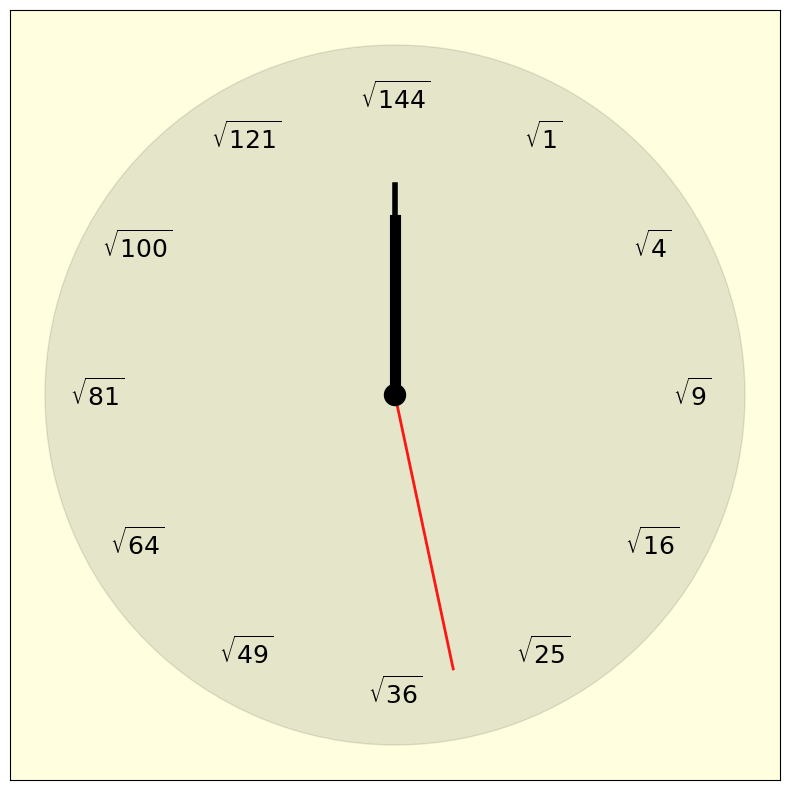

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from IPython.display import display, clear_output
import time

def hour_to_angle(hour):
    """
    Computes the angle for the hour hand on a clock.

    Parameters:
    hour (int): The hour on the clock, as an integer (0 to 12).

    Returns:
    float: The angle in radians for the specified hour.
    """
    return np.pi / 2 - hour * np.pi / 6

def minute_to_angle(minute):
    """
    Computes the angle for the minute hand on a clock.

    Parameters:
    minute (int): The minute on the clock, as an integer (0 to 59).

    Returns:
    float: The angle in radians for the specified minute.
    """
    return np.pi / 2 - minute * np.pi / 30

def second_to_angle(second):
    """
    Computes the angle for the second hand on a clock.

    Parameters:
    second (int): The second on the clock, as an integer (0 to 59).

    Returns:
    float: The angle in radians for the specified second.
    """
    return np.pi / 2 - second * np.pi / 30

def draw_clock():
    """
    Draws the clock and updates it every second.
    """
    while True:
        now = datetime.now()
        current_hour = now.hour % 12
        current_minute = now.minute
        current_second = now.second

        # Calculate the angles of the clock hands
        hour_angle = hour_to_angle(current_hour + current_minute / 60)
        minute_angle = minute_to_angle(current_minute)
        second_angle = second_to_angle(current_second)

        # Draw the clock
        fig, ax = plt.subplots(figsize=(10, 10))

        # Draw the circle
        circle = plt.Circle((0, 0), 1, color='black', fill=True, alpha=0.1)
        ax.add_artist(circle)

        # Labels for the clock
        for hour in range(1, 13):
            angle = hour_to_angle(hour)
            x, y = np.cos(angle), np.sin(angle)
            number = hour ** 2
            formula = f"$\\sqrt{{{number}}}$"
            plt.text(0.85 * x, 0.85 * y, formula, ha='center', va='center', fontsize=18)

        # Hour hand
        hour_hand_length = 0.5
        hour_x = hour_hand_length * np.cos(hour_angle)
        hour_y = hour_hand_length * np.sin(hour_angle)
        ax.plot([0, hour_x], [0, hour_y], color='black', lw=8)

        # Minute hand
        minute_hand_length = 0.6
        minute_x = minute_hand_length * np.cos(minute_angle)
        minute_y = minute_hand_length * np.sin(minute_angle)
        ax.plot([0, minute_x], [0, minute_y], color='black', lw=4)

        # Second hand
        second_hand_length = 0.8
        second_x = second_hand_length * np.cos(second_angle)
        second_y = second_hand_length * np.sin(second_angle)
        ax.plot([0, second_x], [0, second_y], color='red', lw=2, alpha=0.9)

        # Knob in the middle
        center_knob = plt.Circle((0, 0), 0.03, color='black', zorder=5)
        ax.add_artist(center_knob)

        # Turn off axes and background
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
        ax.set_aspect('equal')
        ax.set_facecolor('lightyellow')

        # Update the display
        clear_output(wait=True)
        display(fig)
        plt.close(fig)

        time.sleep(1)

if __name__ == "__main__":
    draw_clock()